In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/MyDrive/ml/nlp/my_dataset.csv')

Mounted at /content/drive


### Первичный обзор

In [ ]:
dataset.head()

,Unnamed: 0,video_id,title,channel_title,tags,views,description
0,0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...
1,1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,Vice Ganda notices Bela Padilla's sudden chang...
2,3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,Hi hi hi! here's our vid on FLASHBACK's channe...
3,6,18658,Just a Couple Friends - Acoustic (MUSIC VIDEO),Sugar Pine 7,"sugar pine 7|""just a couple friends""|""acoustic...",110599.0,Acoustic version of the award winning song. Th...
4,7,59440,烈火如歌 | The Flame's Daughter 12（迪麗熱巴、周渝民、張彬彬等主演）,大劇獨播,"電視劇|""大陸電視劇""|""烈火如歌""|""三生三世十里桃花""|""周渝民""|""迪丽热巴""|""张彬...",69094.0,Thanks for watching the drama! Help more peopl...


In [ ]:
dataset.shape

(14972, 7)

 - video_id	- айди видео
 - title - название
 - channel_title	- название канала
 - tags - теги
 - views - просмотры
 - description - описание



### Токенизация
###### Будем токенизировать title, channel_title, tags и description отдельно
###### Также приводим все к малым буквам

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Токенизируем title и приводим все маленьким буквам, удаляем знаки пунктуаци
title_tokenized = list(dataset['title'].agg(lambda x: word_tokenize(x.lower(), language='english')))
# Токенизируем channel_title и приводим все маленьким буквам
channel_title_tokenized = list(dataset['channel_title'].agg(lambda x: word_tokenize(x.lower(), language='english')))
# Токенизируем tags и приводим все маленьким буквам
tags_tokenized = list(dataset['tags'].agg(lambda x: word_tokenize(x.lower(), language='english')))
# Токенизируем description и приводим все маленьким буквам
description_tokenized = list(dataset['description'].agg(lambda x: word_tokenize(x.lower(), language='english')))

### Удаление стоп слов  и знаков пунктуации





In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(get_text):
  clean_texts = []
  for i in get_text:
    one_part = []
    for k in i:

      if k not in stopwords.words("english"):
        clean_k = k
        # Убираем знаки
        for z in string.punctuation:
          clean_k = clean_k.replace(z,'')

        if len(clean_k)>0:
          one_part.append(clean_k)


    clean_texts.append(one_part)


  return clean_texts




In [ ]:
# Чистим title
title_clean = clean_text(title_tokenized)
# Чистим channel_title
channel_title_clean =clean_text(channel_title_tokenized)
# Чистим tags
tags_clean =clean_text(tags_tokenized)
# Чистим description
description_clean = clean_text(description_tokenized)

### Строим гистограммы размера выборки

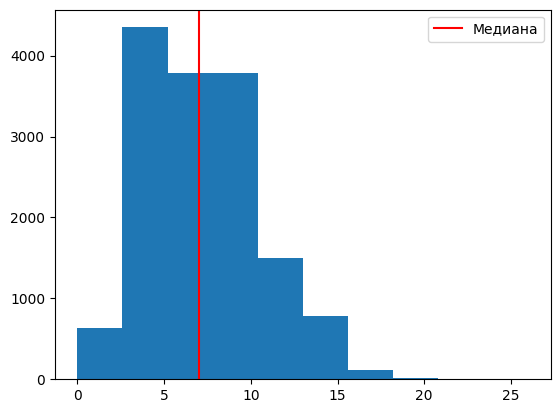

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in title_clean],);
plt.axvline(np.median([len(i) for i in title_clean]),color='red',label='Медиана');
plt.legend();

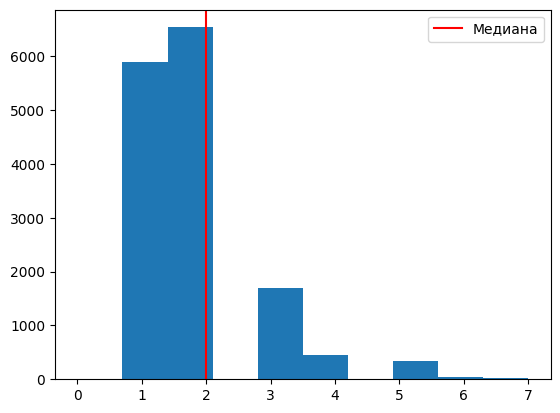

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in channel_title_clean]);
plt.axvline(np.median([len(i) for i in channel_title_clean]),color='red',label='Медиана');
plt.legend();

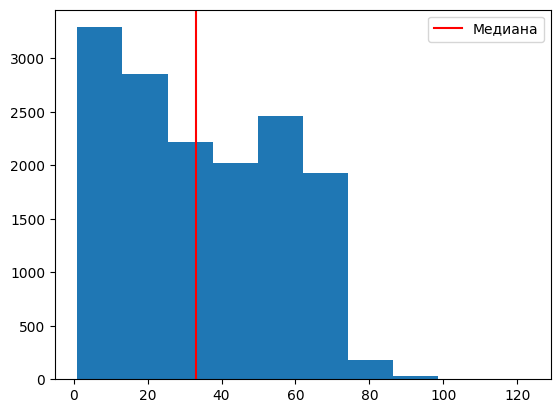

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in tags_clean]);
plt.axvline(np.median([len(i) for i in tags_clean]),color='red',label='Медиана');
plt.legend();

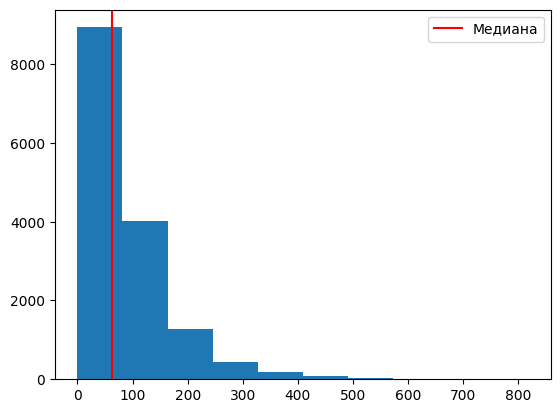

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(i) for i in description_clean]);
plt.axvline(np.median([len(i) for i in description_clean]),color='red',label='Медиана');
plt.legend();

##### Из анализа гистограмм берем следующие размеры пэддинга
- Для title 14 слов
- Для channel_title берем 6 слов
- Для tags  берем 80 слов
- Для description берем 400
- Итого максимальная длинна 500

### Обрежем текст

In [ ]:
def cut(text, size):

  cuted_text = []
  for i in text:



    if len(i)>size:

      cuted_text.append(i[:size])

    else:

      cuted_text.append(i)

  return cuted_text




In [ ]:
# Обрезаем title
title_cut = cut(title_clean, 14)
# Обрезаем channel_title
channel_cut =cut(channel_title_clean, 6)
# Обрезаем tags
tags_cut =cut(tags_clean, 80)
# Обрезаем description
description_cut = cut(description_clean, 400)



### Склеим все описания для каждого видео слова разделяем пробелами

In [ ]:
def concatenate_on_des(des):
  res = []
  for i in des:
    one_res = ''
    for j in i:

      one_res = one_res +' '+j


    res.append(one_res)

  return res

title_concate = concatenate_on_des(title_cut)
channel_concate = concatenate_on_des(channel_cut)
tags_concate = concatenate_on_des(tags_cut)
description_concate = concatenate_on_des(description_cut)
# Соединяем все описания
full_description =  [i + j + k + z for i,j,k,z in zip( channel_concate, title_concate,tags_concate,description_concate)]

In [ ]:
full_description[10:13]

[' merrelltwins real life vs anime merrell twins ft jessie paege merrell twins twins merrelltwins merrell twins twin real life vs anime real life vs anime vs real life real food vs gummy real vs twin sisters comedy family friendly gummy vs real food gummy food vs real food veronica merrell vanessa merrell kid friendly anime anime sketch anime comedy anime characters jessie paege funny goofy spoof fails fail friendly laugh hilarious best comedy ever wondered life would like lived anime like world lol made video check jessie s video https youtubetpkquduiolonsubscribe jessie https wwwyoutubecomuserglamwithjessiennnew videos every tuesday subscribe channel http bitly2dsp9fg nnnncheck videos nit s valentines daynhttps youtubeytmpi6iw9on50 things say exnhttps youtubenouu5aojiwnchristmas nt please dontnhttps youtubew4xrmuotwomnguess youtubernhttps youtubezcswskfugtmn10 things re wrong schoolnhttps youtubepdkl08tgcyannsubscribe channels nmerrell twins livenhttp bitly2pyeuosnmore merrellnhttp b

In [ ]:
# Сохраним файл
with open('full_description.txt', 'w') as txt_file:
    txt_file.write(str(full_description))

### Приведение к шкале от 0 до 1

In [ ]:
from sklearn import preprocessing

norm = list(preprocessing.MinMaxScaler().fit_transform(np.array(dataset['views']).reshape(-1, 1)).reshape(-1))

In [ ]:
# Сохраняем оценки
with open('labels.txt', 'w') as txt_file:
    txt_file.write(str(norm))

In [ ]:
import shutil
shutil.copyfile('/content/full_description.txt', '/content/drive/MyDrive/ml/nlp/full_description.txt')
shutil.copyfile('/content/labels.txt', '/content/drive/MyDrive/ml/nlp/labels.txt')


'/content/drive/MyDrive/ml/nlp/labels.txt'